In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [50]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1621, 49)

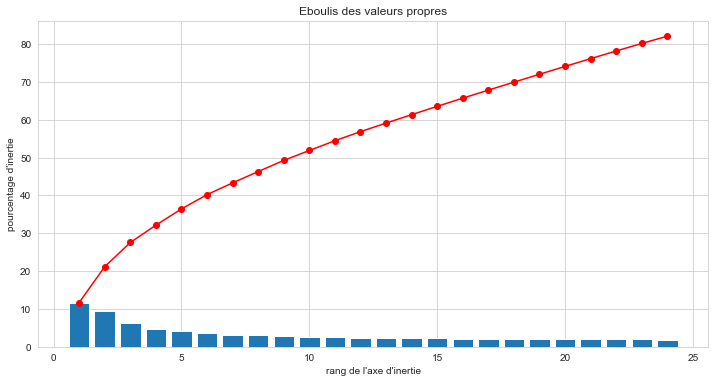

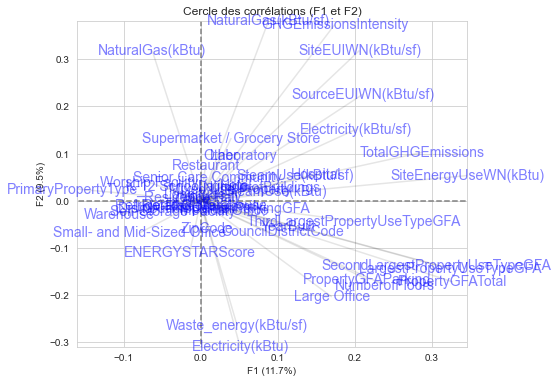

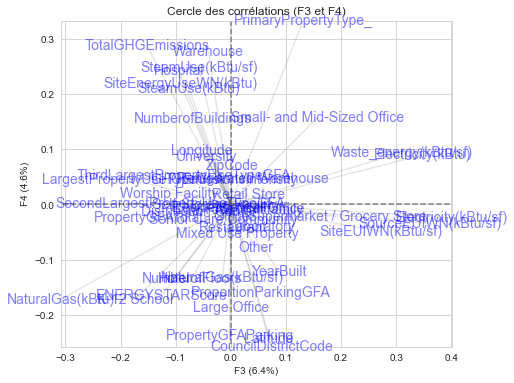

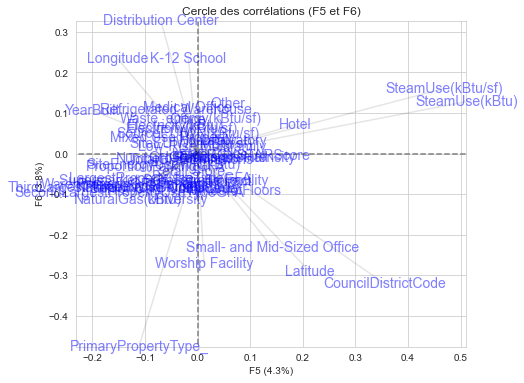

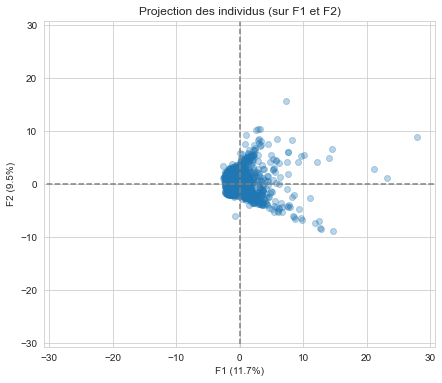

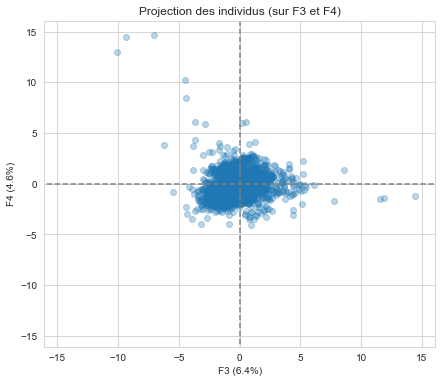

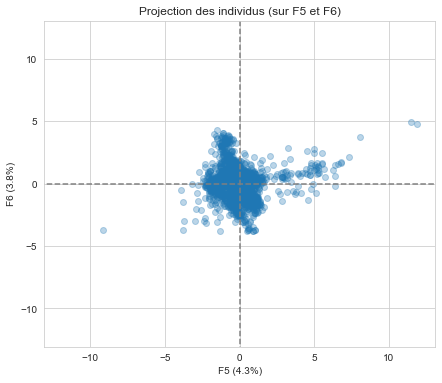

In [65]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

#nombre de composantes à calculer:
n_comp = 24

#colonnes numeriques:
data_pca = df

# préparation des données pour l'ACP
X = data_pca.values
# names = [data.loc[i, "bad_fodmap"] for i in data.index]  # ou data.index pour avoir les intitulés
features = df.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],alpha = 0.3)

plt.show()